In [1]:
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Load the data
df = pd.read_csv("sectionized_data.csv")  # Replace "your_data.csv" with the path to your CSV file
df = df.dropna()
documents = df['Body'].tolist()

# Define preprocessing function
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:  # Filter out stopwords and short tokens
            result.append(token)
    return result

# Apply preprocessing to each document
processed_documents = [preprocess(doc) for doc in documents]

In [8]:
from gensim.models import HdpModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Create a dictionary representation of the documents
dictionary = Dictionary(processed_documents)

# Filter out tokens that appear in less than 10 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in processed_documents]

# Calculate coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(5, 50, 5):  # Adjust the range as needed
    hdp_model = HdpModel(corpus, id2word=dictionary, T=num_topics)
    coherence_model = CoherenceModel(model=hdp_model, texts=processed_documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Find the optimal number of topics based on coherence score
optimal_num_topics = max(coherence_scores, key=lambda x: x[1])[0]
print("Optimal Number of Topics:", optimal_num_topics)

C:\Users\jositav.2020\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jositav.2020\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Optimal Number of Topics: 5


In [14]:
from gensim.models import HdpModel
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents
dictionary = Dictionary(processed_documents)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in processed_documents]

# Train the HDP model
hdp_model = HdpModel(corpus, id2word=dictionary)

# Get the topics and their associated probabilities
topics = hdp_model.print_topics(num_topics=5, num_words=10)

# Print the topics
# for topic in topics:
#     print(topic)

topic_word_distributions = {}

# Parse and save the topics
for topic_id, topic in topics:
    topic_word_distributions["Topic: " + str(topic_id)] = {word.split('*')[1].strip(): float(word.split('*')[0]) for word in topic.split(' + ')}

# Print the dictionary
print(topic_word_distributions)

{'Topic: 0': {'comity': 0.022, 'court': 0.015, 'proceedings': 0.011, 'foreign': 0.01, 'international': 0.01, 'judgments': 0.007, 'sovereignty': 0.007, 'case': 0.006, 'judgment': 0.006, 'parties': 0.006}, 'Topic: 1': {'court': 0.022, 'issue': 0.021, 'issues': 0.015, 'public': 0.011, 'question': 0.01, 'estoppel': 0.01, 'decision': 0.01, 'courts': 0.009, 'foreign': 0.009, 'english': 0.008}, 'Topic: 2': {'concurso': 0.023, 'court': 0.019, 'respondents': 0.019, 'lawyers': 0.015, 'guerra': 0.013, 'integradora': 0.012, 'petitions': 0.012, 'bond': 0.009, 'respondent': 0.009, 'appellant': 0.009}, 'Topic: 3': {'injunction': 0.021, 'court': 0.014, 'interim': 0.013, 'final': 0.01, 'grant': 0.01, 'relief': 0.008, 'granted': 0.008, 'injunctions': 0.007, 'breach': 0.007, 'basis': 0.006}, 'Topic: 4': {'appellant': 0.016, 'respondents': 0.015, 'judge': 0.013, 'relief': 0.01, 'final': 0.009, 'integradora': 0.008, 'basis': 0.007, 'mexico': 0.007, 'insolvency': 0.007, 'granting': 0.006}}


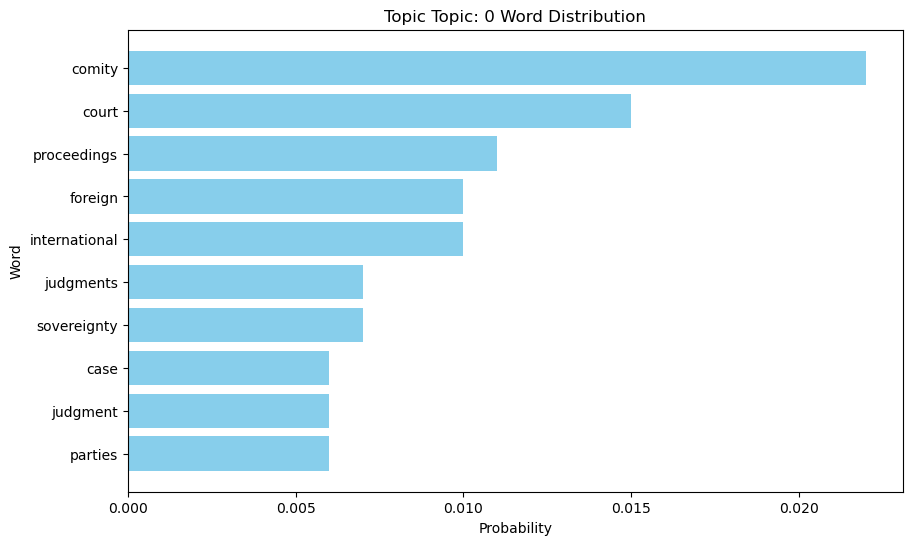

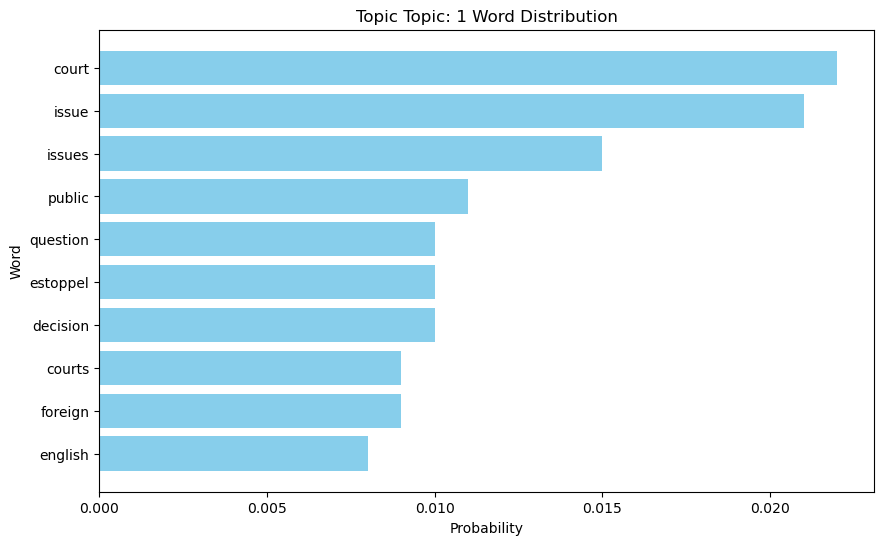

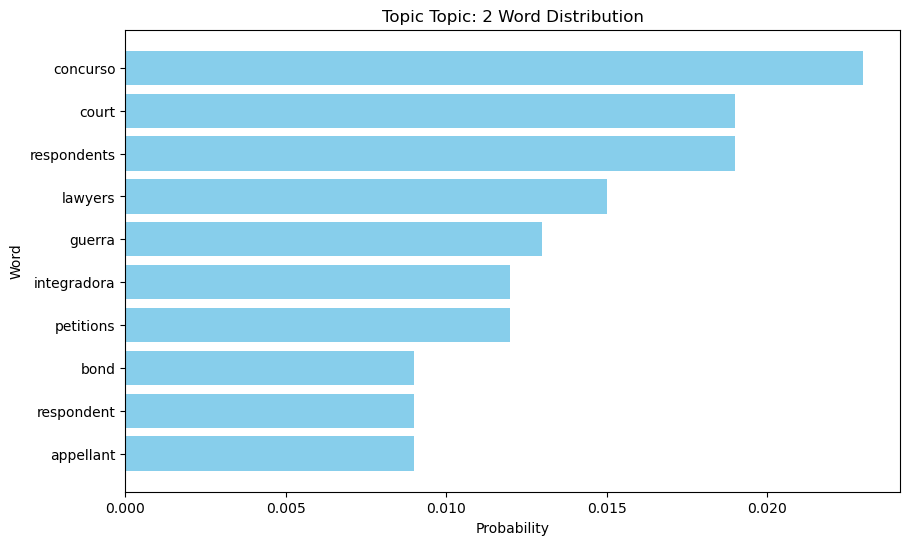

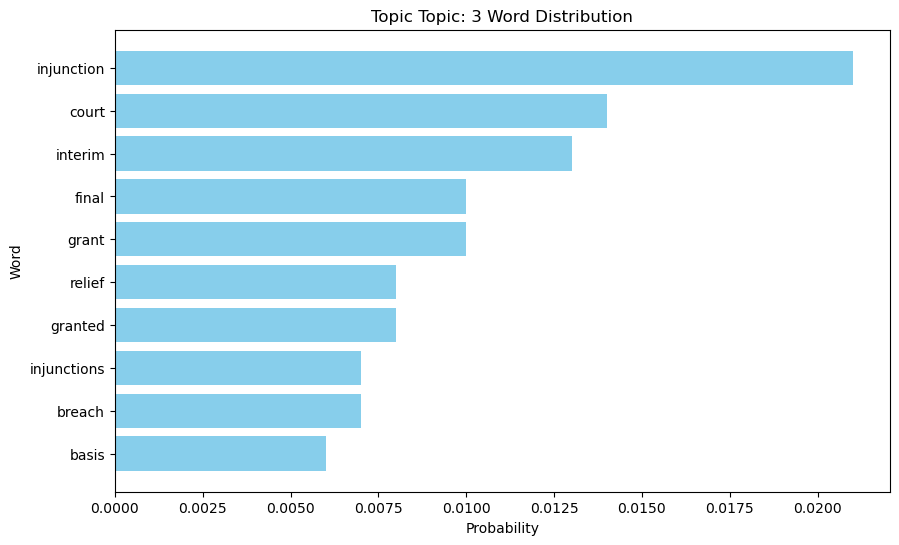

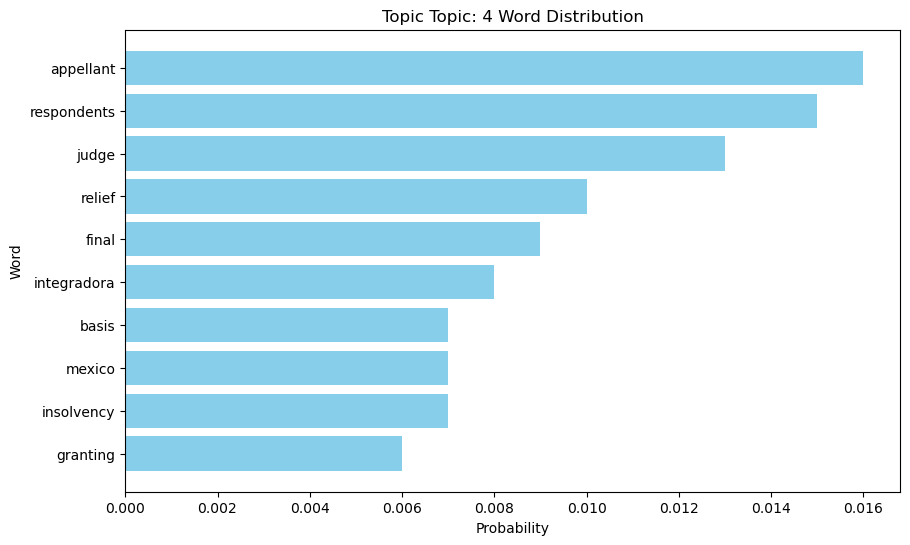

In [15]:
import matplotlib.pyplot as plt

# Create a function to visualize the topic word distribution
def visualize_topic_distribution(topic_word_distributions):
    num_topics = len(topic_word_distributions)
    
    # Plot each topic
    for topic_id, word_distribution in topic_word_distributions.items():
        words = list(word_distribution.keys())
        probabilities = list(word_distribution.values())
        
        plt.figure(figsize=(10, 6))
        plt.barh(words, probabilities, color='skyblue')
        plt.xlabel('Probability')
        plt.ylabel('Word')
        plt.title(f'Topic {topic_id} Word Distribution')
        plt.gca().invert_yaxis()  # Invert y-axis to display the most probable words at the top
        plt.show()

# Visualize the topic word distribution
visualize_topic_distribution(topic_word_distributions)


In [17]:
# Get the topic distributions for each document
doc_topic_distributions = hdp_model[corpus]

# Get the dominant topic for each document
dominant_topics = []
for doc_topics in doc_topic_distributions:
    if len(doc_topics) > 0:
        dominant_topic = max(doc_topics, key=lambda item: item[1])[0]
        dominant_topics.append(dominant_topic)
    else:
        dominant_topics.append(None)  # If there are no topics assigned to the document

# Now dominant_topics contains the dominant topic for each document
# You can associate these dominant topics with the corresponding documents in your DataFrame
df['dominant_topic'] = dominant_topics
print(df['dominant_topic'])

0     12
1     89
2      7
3     13
4     11
5      5
6      2
7      4
8      8
9     10
10    21
11     3
12     9
13     0
14     1
15     0
16     6
17    14
Name: dominant_topic, dtype: int64


In [19]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2d

In [20]:
import numpy as np
import pandas as pd
import gensim
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to each document in df['Body']
processed_docs = df['Body'].apply(preprocess_text)

# Create TaggedDocument for training the Doc2Vec model
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(processed_docs)]

# Train Doc2Vec model
doc2vec_model = gensim.models.Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Extract document embeddings
document_embeddings = [doc2vec_model.docvecs[str(i)] for i in range(len(tagged_data))]

# Convert document embeddings to GloVe-like format
document_vectors = np.array(document_embeddings)

# Define the NTM-GloVe model using TensorFlow
class NTM_GloVe_TensorFlow:
    def __init__(self, num_topics):
        self.num_topics = num_topics
        self.model = self.build_model()

    def build_model(self):
        model = Sequential([
            Dense(512, activation='relu', input_shape=(100,)),
            Dense(self.num_topics, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy')
        return model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=10, batch_size=32)

    def transform(self, X):
        return self.model.predict(X)

# Convert document embeddings to one-hot encodings (for topics)
document_vectors_onehot = np.eye(num_topics)[np.random.choice(num_topics, document_vectors.shape[0])]

# Train NTM-GloVe model
ntm_glove_tf_model = NTM_GloVe_TensorFlow(num_topics)
ntm_glove_tf_model.fit(document_vectors, document_vectors_onehot)

# Get the topic distributions for each document
document_topic_distributions = ntm_glove_tf_model.transform(document_vectors)

# Print topic distributions for all documents
for i, doc_topic_distribution in enumerate(document_topic_distributions):
    print(f"Topic Distribution for Document {i + 1}:")
    print(doc_topic_distribution)


C:\Users\jositav.2020\AppData\Local\Temp\ipykernel_5540\1431970045.py:37: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  document_embeddings = [doc2vec_model.docvecs[str(i)] for i in range(len(tagged_data))]
C:\Users\jositav.2020\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.9691
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 3.4898
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 3.1093
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 2.8545
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 2.7122
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 2.6220
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 2.5414
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 2.4634
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 2.3973
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 2.3508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Topic Distribution for Document 1:
[0.00570142 0.00467965 0.0087552  0.02383646 0.00572663 0.07274794
 0.00605029 0.03551533 0.06878632 0.00750283 0.00708    0.06794816
 0.00778542 0.0071519  0.01360294 0.00725388 0.00924874 0.00578151
 0.01023329 0.00601669 0.00535331 0.00519064 0.00962559 0.00908252
 0.05701124 0.011

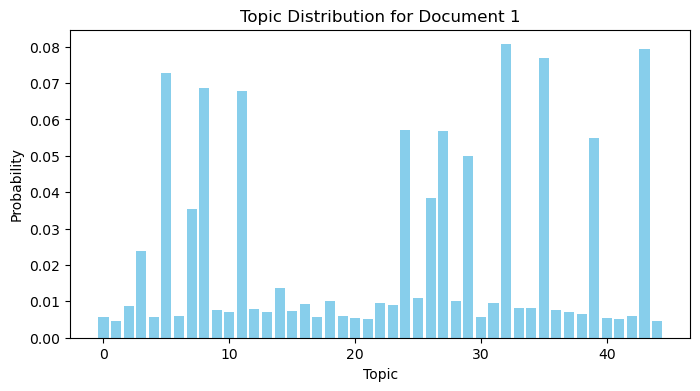

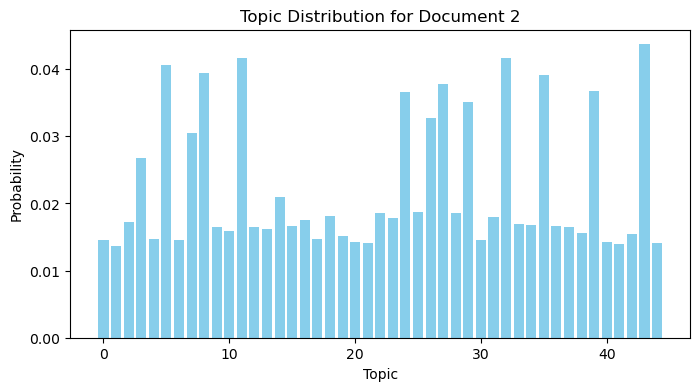

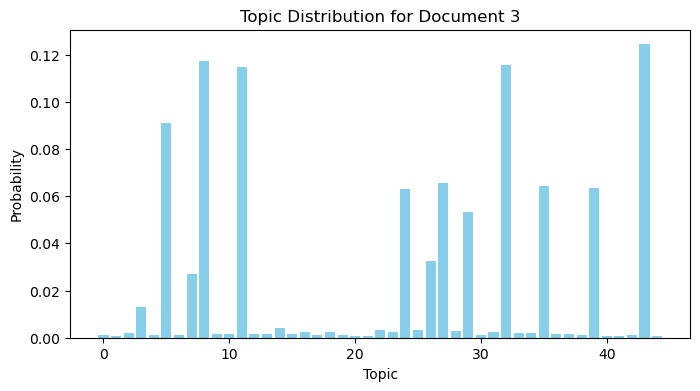

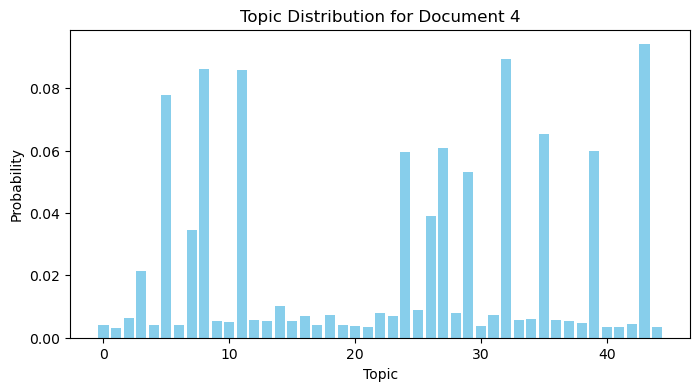

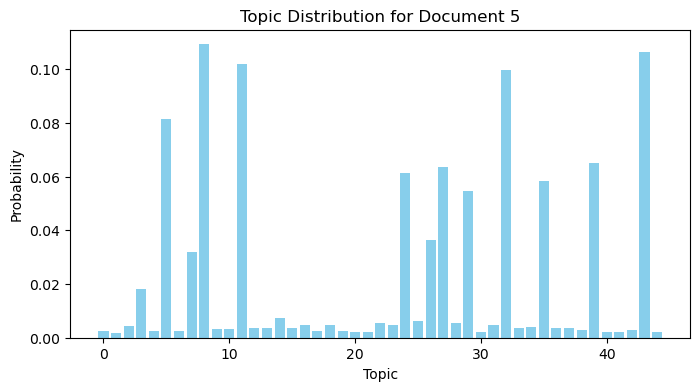

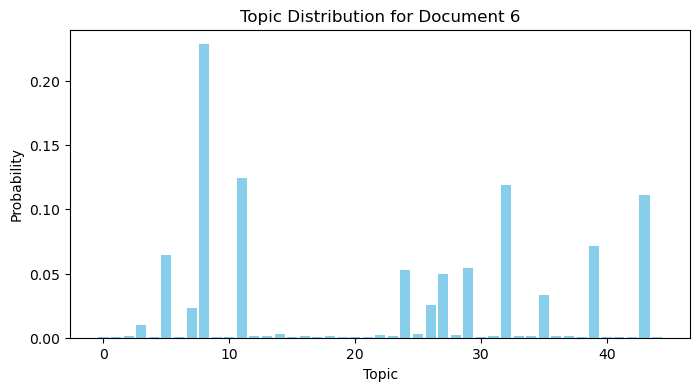

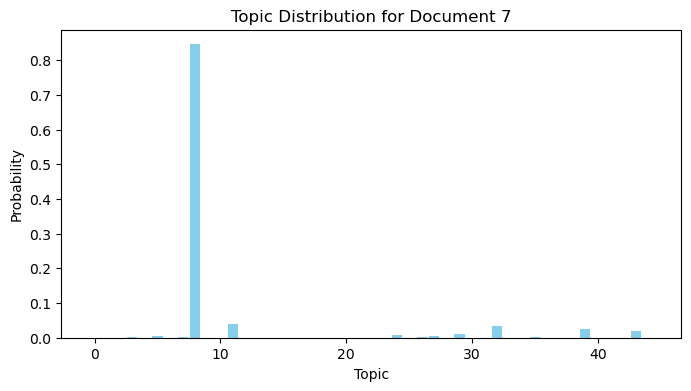

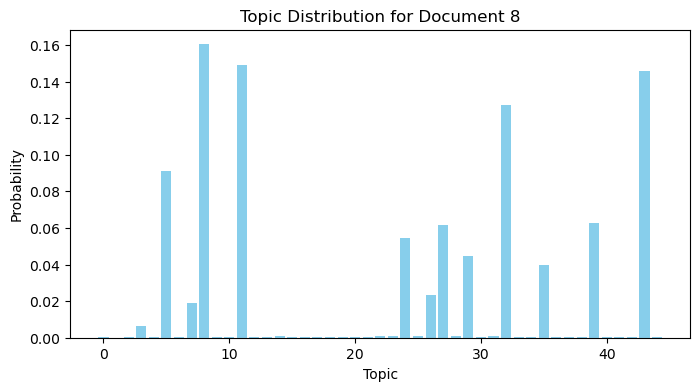

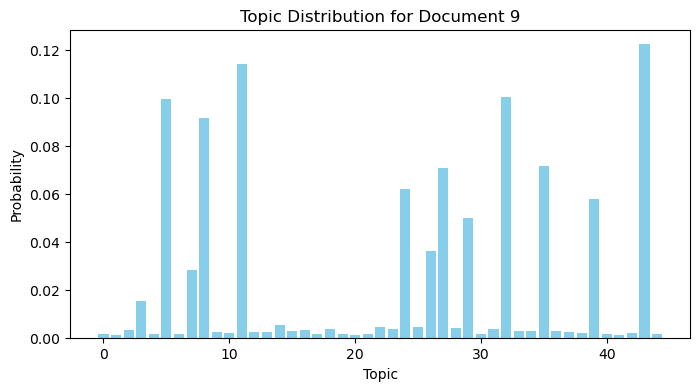

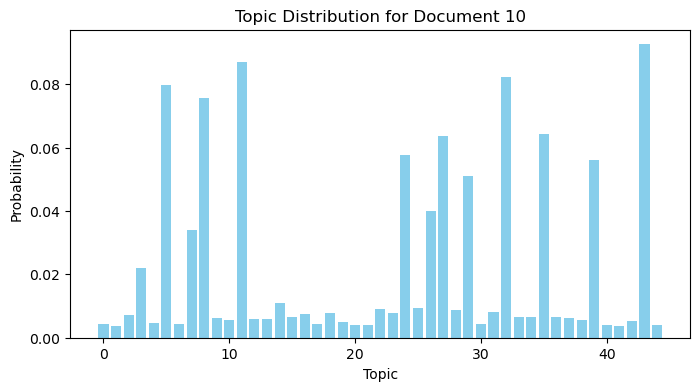

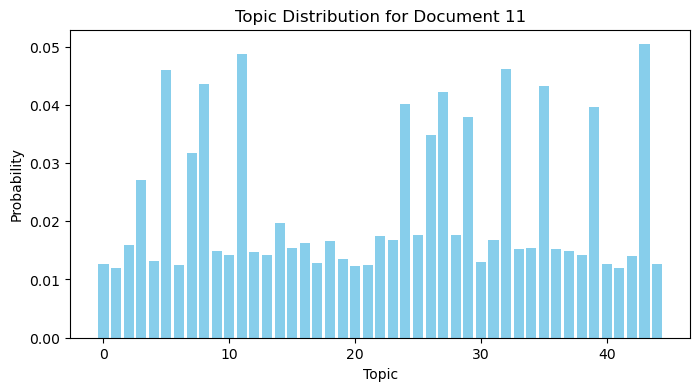

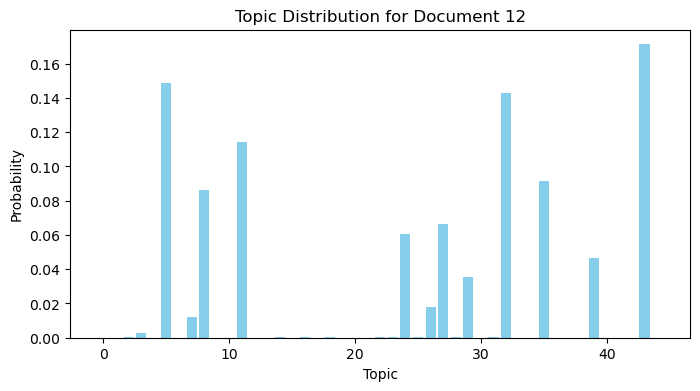

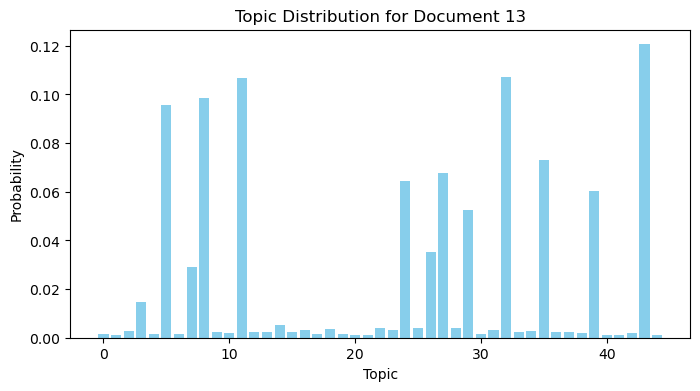

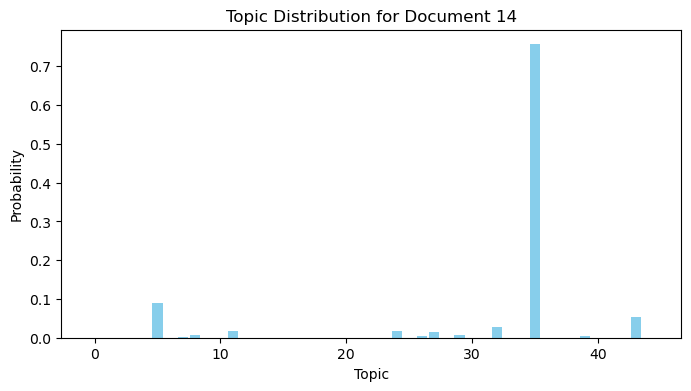

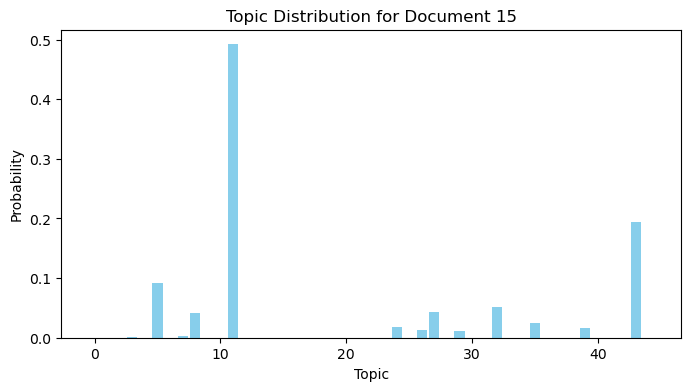

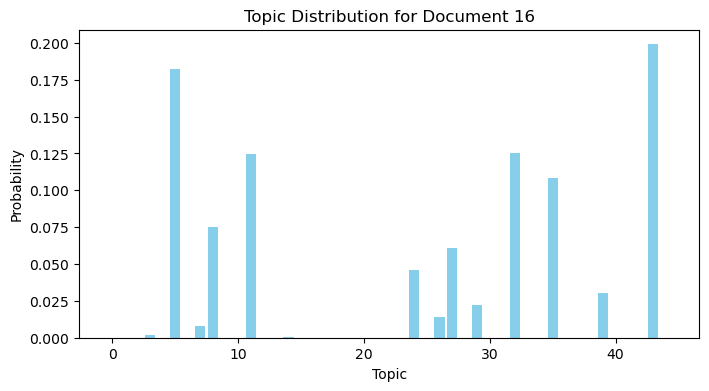

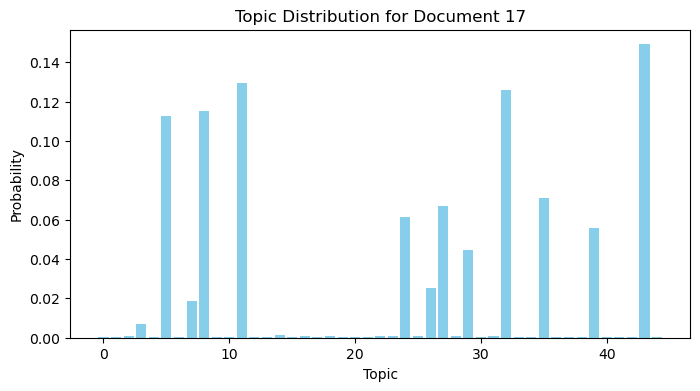

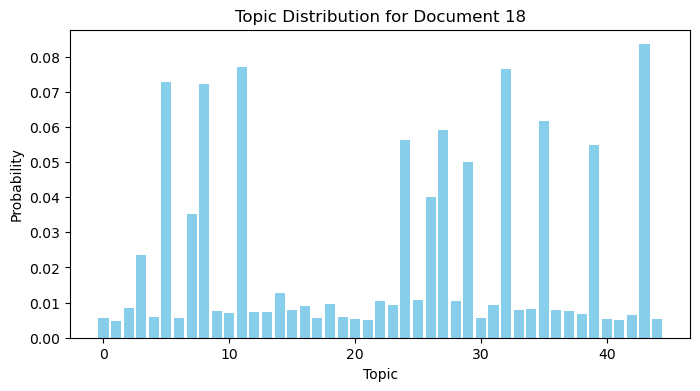

In [21]:
import matplotlib.pyplot as plt

# Plot topic distributions for all documents
for i, doc_topic_distribution in enumerate(document_topic_distributions):
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(doc_topic_distribution)), doc_topic_distribution, color='skyblue')
    plt.xlabel('Topic')
    plt.ylabel('Probability')
    plt.title(f'Topic Distribution for Document {i + 1}')
    plt.show()


In [27]:
from gensim.models.coherencemodel import CoherenceModel

# Define a function to calculate coherence score
def calculate_coherence_score(model, documents, dictionary, coherence='c_v'):
    # Get the topics
    topics = model.get_topics()

    # Compute coherence score
    coherence_model = CoherenceModel(topics=topics, texts=documents, dictionary=dictionary, coherence=coherence)
    coherence_score = coherence_model.get_coherence()
    
    return coherence_score

# Create a Gensim Dictionary
dictionary = gensim.corpora.Dictionary(processed_docs)

# Calculate coherence score
coherence_score = calculate_coherence_score(ntm_glove_tf_model, processed_docs, dictionary)
print("Coherence Score:", coherence_score)


Coherence Score: 0.2691167087221963


In [22]:
# Initialize a list to store dominant topics
dominant_topics = []

# Iterate through the document topic distributions
for doc_topic_distribution in document_topic_distributions:
    # Find the index of the topic with the highest probability
    dominant_topic_index = np.argmax(doc_topic_distribution)
    # Append the dominant topic index to the list
    dominant_topics.append(dominant_topic_index)

# Print the dominant topics for each document
for i, dominant_topic in enumerate(dominant_topics):
    print(f"Document {i + 1}: Dominant Topic {dominant_topic}")

Document 1: Dominant Topic 32
Document 2: Dominant Topic 43
Document 3: Dominant Topic 43
Document 4: Dominant Topic 43
Document 5: Dominant Topic 8
Document 6: Dominant Topic 8
Document 7: Dominant Topic 8
Document 8: Dominant Topic 8
Document 9: Dominant Topic 43
Document 10: Dominant Topic 43
Document 11: Dominant Topic 43
Document 12: Dominant Topic 43
Document 13: Dominant Topic 43
Document 14: Dominant Topic 35
Document 15: Dominant Topic 11
Document 16: Dominant Topic 43
Document 17: Dominant Topic 43
Document 18: Dominant Topic 43
